Nothing done.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1/1 [==============================] - 1s 919ms/step


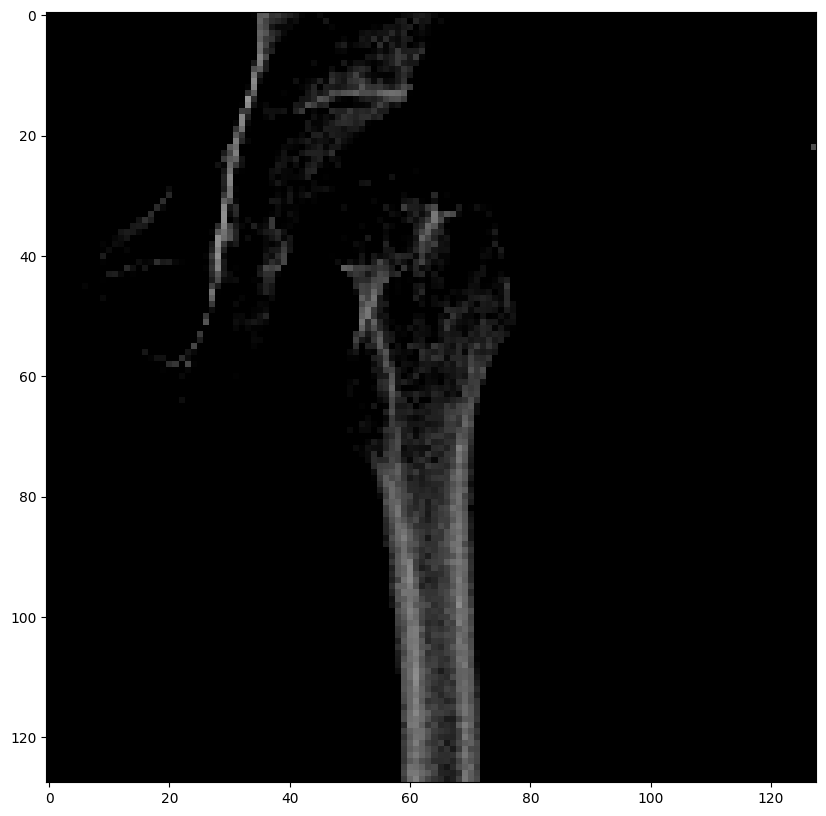

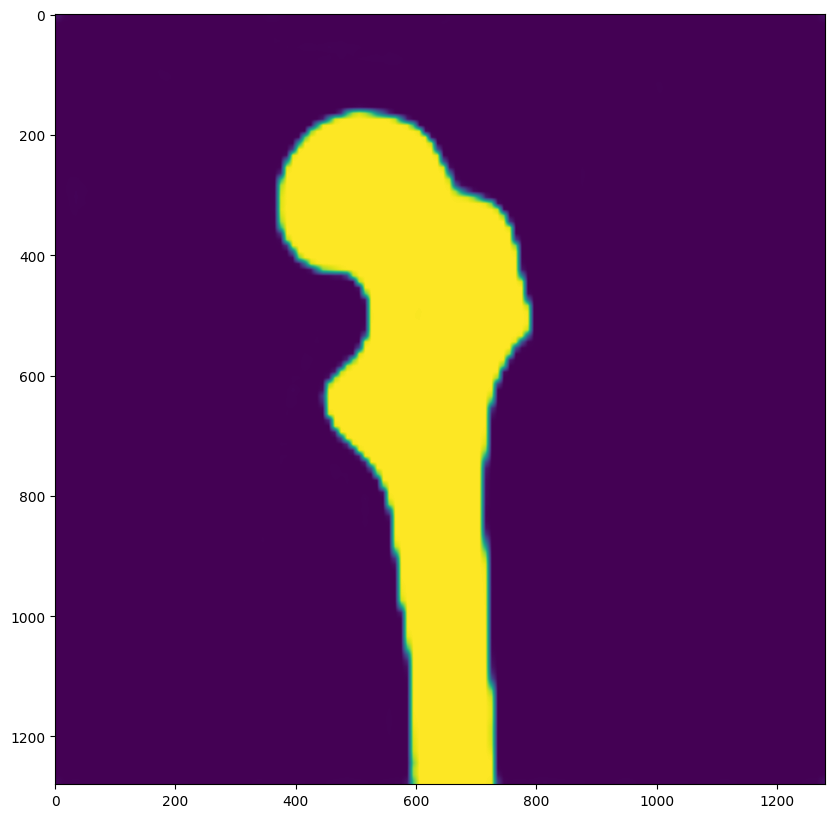

In [ ]:
%reset
import glob
import cv2
import os
os.environ["SM_FRAMEWORK"] = "tf.keras"
import tensorflow as tf
import segmentation_models as sm
import matplotlib.pyplot as plt
import numpy as np
import keras
from PIL import Image, ImageQt

from keras.utils import normalize
from keras.metrics import MeanIoU

from keras.models import load_model

model1 = load_model('./model/inceptionv3_backbone_30epochs.hdf5', compile=False)

sess = keras.backend.get_session()
samples = []

img = tf.io.read_file('./1.jpg')
img = tf.image.decode_jpeg(img, channels=3)
img = tf.image.resize(img, (128, 128))

BACKBONE1 = 'inceptionv3'
preprocess_input1 = sm.get_preprocessing(BACKBONE1)
X_train1 = preprocess_input1(img)
imgpil = tf.keras.preprocessing.image.img_to_array(X_train1)
plt.figure(figsize=(20,10))
plt.imshow(imgpil)
plt.savefig('foo.png', bbox_inches='tight')
img = np.expand_dims(X_train1, 0)
samples.append(img)
y_pred1=model1.predict(samples)
y_pred1= tf.image.resize(y_pred1,(1280,1280))

plt.figure(figsize=(20,10))
plt.imshow(np.squeeze(y_pred1[0,:,:,1]))